<a href="https://colab.research.google.com/github/Palak730/Book-recommendation-system/blob/main/Book_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Book Recommendation System



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** - Palak Srivastava


# **Project Summary -**

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents. matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant. items to users (items being movies to watch, text to read, products to buy, or Danything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main lobjective is to credite o book recommendation system for users

# **GitHub Link -**

Provide your GitHub Link here.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
book_data=pd.read_csv('/content/drive/MyDrive/data_book_recommendation/Books.csv')
user_data=pd.read_csv('/content/drive/MyDrive/data_book_recommendation/Users.csv')
rating_data=pd.read_csv('/content/drive/MyDrive/data_book_recommendation/Ratings.csv')

print("Books Data:    ", book_data.shape)
print("Users Data:    ", user_data.shape)
print("Ratings Data: ", rating_data.shape)


Books Data:     (271360, 8)
Users Data:     (278858, 3)
Ratings Data:  (1149780, 3)


**Book Data**

In [ ]:
# Dataset First Look
book_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [ ]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
# Remove non-numeric values and convert the column to 'int32'
book_data['Year-Of-Publication'] = pd.to_numeric(book_data['Year-Of-Publication'], errors='coerce').astype('Int32')

In [ ]:
# droping the url
book_data.drop(['Image-URL-S', 'Image-URL-M' ], axis= 1, inplace= True)

In [ ]:
# Rename the 'isbn' column to 'ISBN' in the book_data DataFrame
book_data.rename(columns={'isbn': 'ISBN','Image-URL-L':'image_url'}, inplace=True)

In [ ]:
# replacing '-' with '_' and features name in lower case
book_data.columns= book_data.columns.str.strip().str.lower().str.replace('-', '_')

In [ ]:
pd.set_option('display.max_colwidth', -1)
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   book_title           271360 non-null  object
 2   book_author          271359 non-null  object
 3   year_of_publication  271357 non-null  Int32 
 4   publisher            271358 non-null  object
 5   image_url            271357 non-null  object
dtypes: Int32(1), object(5)
memory usage: 11.6+ MB


In [ ]:
book_data.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


**User Data**

In [ ]:
user_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
## Checking null values
print(user_data.isna().sum())

User-ID     0
Location    0
Age         0
dtype: int64


In [ ]:
# Remove rows with null values in the 'Age' column and modify the original DataFrame
user_data.dropna(subset=['Age'], inplace=True)
# Convert the 'Age' column to int and handle missing values with 'NaN'
user_data['Age'] = user_data['Age'].astype('Int32')

# Verify the modified DataFrame
print(user_data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 168096 entries, 1 to 278854
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   User-ID   168096 non-null  int64 
 1   Location  168096 non-null  object
 2   Age       168096 non-null  Int32 
dtypes: Int32(1), int64(1), object(1)
memory usage: 4.6+ MB
None


In [ ]:
print("Columns: ", list(user_data.columns))
user_data.head()

Columns:  ['User-ID', 'Location', 'Age']


,User-ID,Location,Age
1,2,"stockton, california, usa",18
3,4,"porto, v.n.gaia, portugal",17
5,6,"santa monica, california, usa",61
9,10,"albacete, wisconsin, spain",26
10,11,"melbourne, victoria, australia",14


**Rating Data**

In [ ]:
rating_data.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
## Checking null values
print(rating_data.isna().sum())

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [ ]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


####**Merging of all three Tables**

 **Merging Book_data, User_data and Rating_data Tables in One**

In [ ]:
data = pd.merge(book_data, rating_data, on='ISBN', how='inner')
data = pd.merge(data, user_data, on='User-ID', how='inner')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753301 entries, 0 to 753300
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 753301 non-null  object
 1   book_title           753301 non-null  object
 2   book_author          753300 non-null  object
 3   year_of_publication  753299 non-null  Int32 
 4   publisher            753299 non-null  object
 5   image_url            753299 non-null  object
 6   User-ID              753301 non-null  int64 
 7   Book-Rating          753301 non-null  int64 
 8   Location             753301 non-null  object
 9   Age                  753301 non-null  Int32 
dtypes: Int32(2), int64(2), object(6)
memory usage: 58.9+ MB


**Divide complete data on the basis of Implicit and Explicit ratings data**

In [ ]:
# Divide the data into explicit and implicit ratings
explicit_ratings = data[data['Book-Rating'] != 0]
implicit_ratings = data[data['Book-Rating'] == 0]

In [ ]:
# Verify the sizes of the explicit and implicit ratings datasets
print("Explicit ratings:", explicit_ratings.shape)
print("Implicit ratings:", implicit_ratings.shape)

Explicit ratings: (269621, 9)
Implicit ratings: (483680, 9)


In [ ]:
data.head()

,ISBN,book_title,book_author,year_of_publication,publisher,image_url,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg,2,0,"stockton, california, usa",18
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,11400,0,"ottawa, ontario, canada",49
2,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,http://images.amazon.com/images/P/0786868716.01.LZZZZZZZ.jpg,11400,9,"ottawa, ontario, canada",49
3,0151008116,Life of Pi,Yann Martel,2002,Harcourt,http://images.amazon.com/images/P/0151008116.01.LZZZZZZZ.jpg,11400,6,"ottawa, ontario, canada",49
4,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,http://images.amazon.com/images/P/0671021001.01.LZZZZZZZ.jpg,11400,0,"ottawa, ontario, canada",49


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

####Distribution of ratings

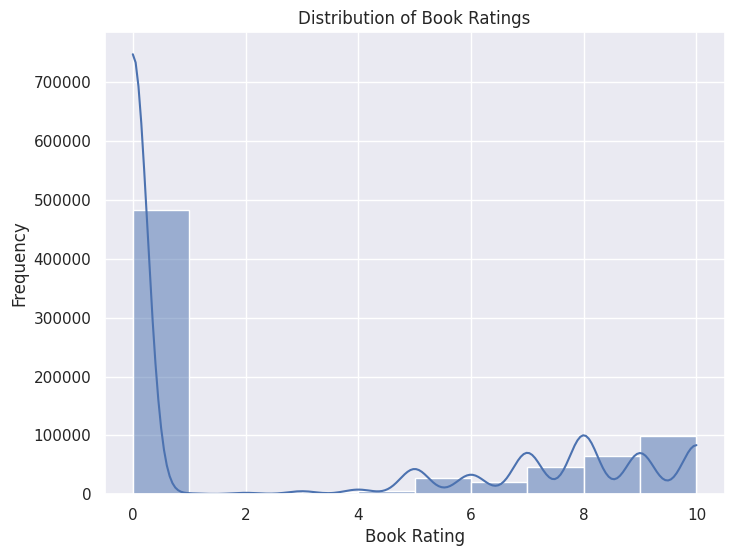

In [ ]:
# 1. Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(data['Book-Rating'], bins=10, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Frequency')
plt.show()

 **1. High occurrence of 0 ratings, indicating non-participation by some users.**

**2. Consistent preference for an 8 out of 10 rating, suggesting positive yet not extraordinary reviews.**

**3. Rare use of the highest rating (10), implying stringent criteria for exceptional books.**

#### Distribution of Age

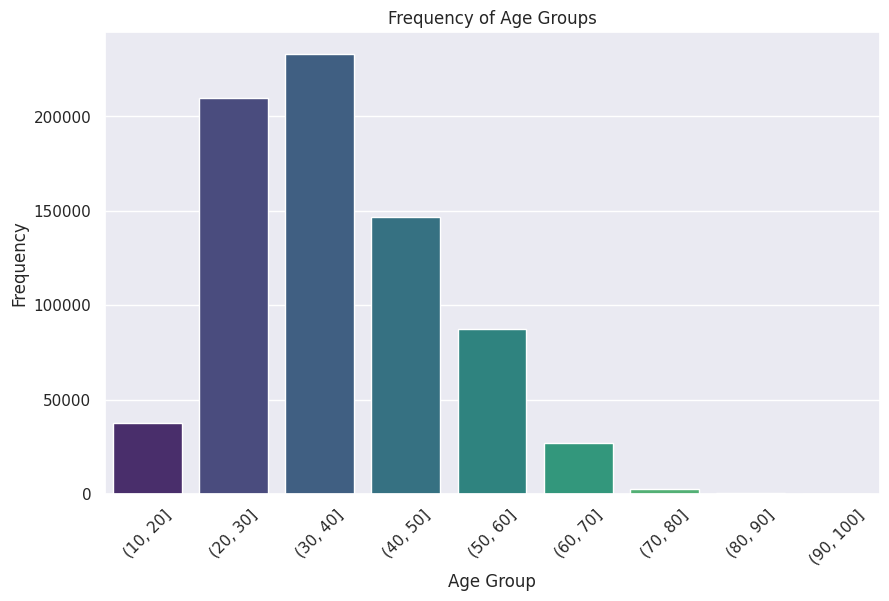

In [ ]:
# 2. Distribution of Age
# Define the age intervals
age_intervals = [10 * i for i in range(1, 11)]

# Group the ages into intervals
data['Age Group'] = pd.cut(data['Age'], bins=age_intervals)

# Plot the frequency of each age group
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Age Group', palette='viridis')
plt.title('Frequency of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

 **Based on the frequency plot of age groups, we can conclude that the age group between 30 and 40 years has the highest frequency, suggesting that users within this age range are the most represented in the dataset.**

####Ratings by Book Title

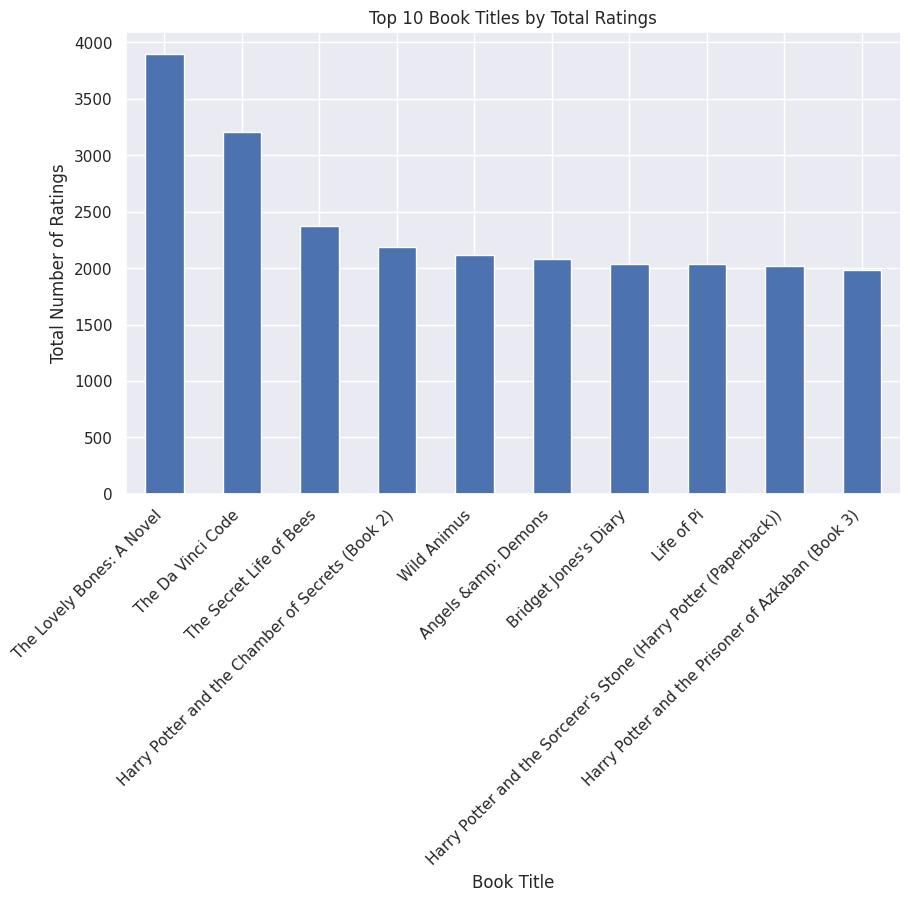

In [ ]:
# Visualization 8: Ratings by Book Title
plt.figure(figsize=(10, 6))
top_rated_books_titles = data.groupby('book_title')['Book-Rating'].sum().sort_values(ascending=False).head(10)
top_rated_books_titles.plot(kind='bar')
plt.title('Top 10 Book Titles by Total Ratings')
plt.xlabel('Book Title')
plt.ylabel('Total Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

**The graph highlights the top 10 most rated books, with "The Lovely Bones: A novel" as the book receiving the highest number of ratings.**

#### Ratings Count by Year of Publication

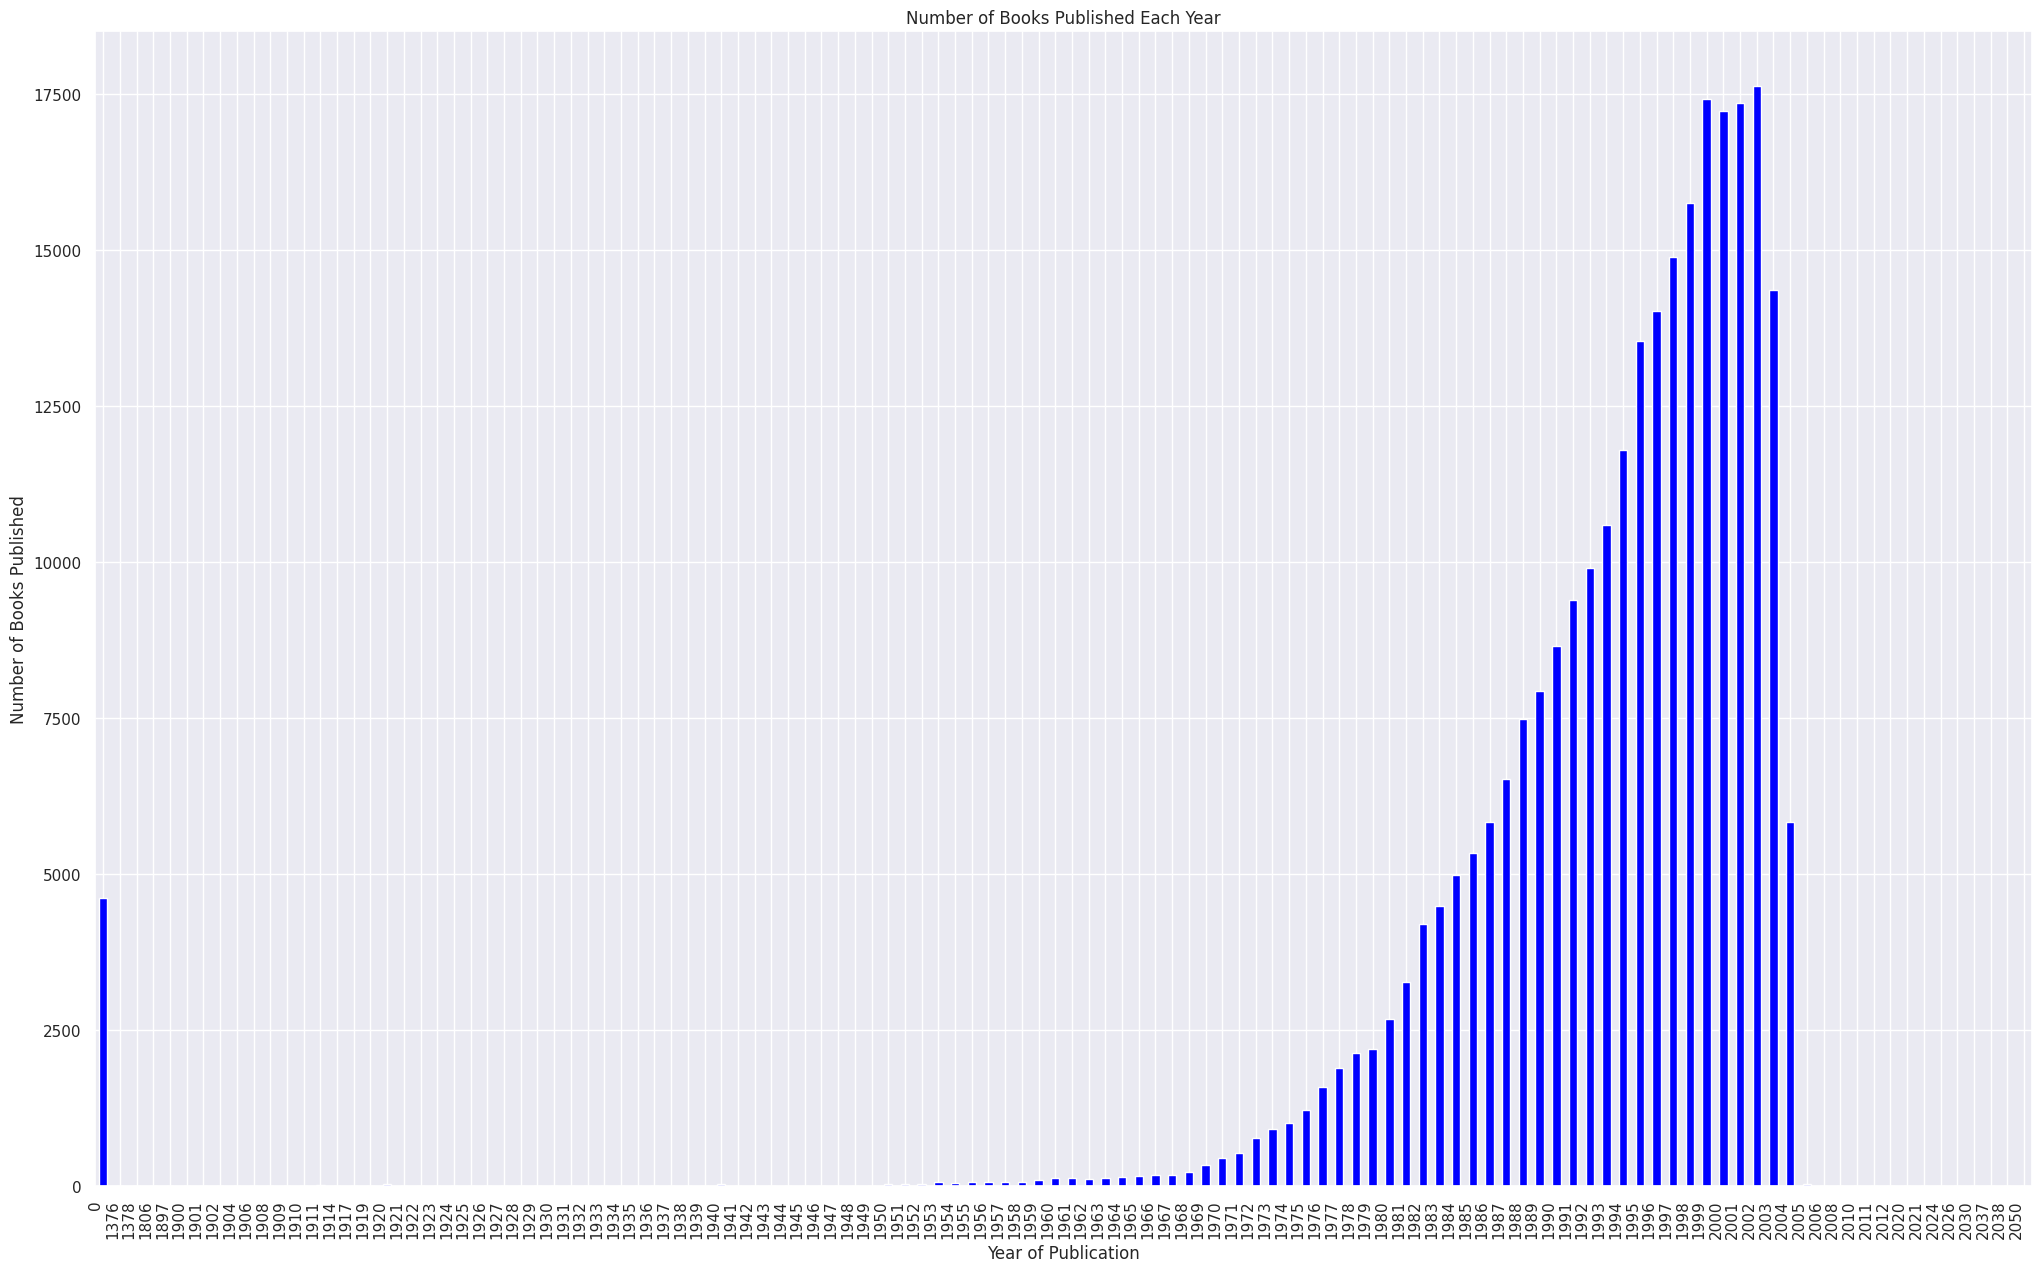

In [ ]:
# Fill missing values in the 'year_of_publication' column with a placeholder year, e.g., 0
data['year_of_publication'].fillna(0, inplace=True)

# Convert the 'year_of_publication' column to integer (removes decimal part)
data['year_of_publication'] = data['year_of_publication'].astype(int)

# Count the number of books published each year
publications = book_data['year_of_publication'].value_counts().sort_index()

# Create a bar chart
fig, ax = plt.subplots(figsize=(25,15))
publications.plot(kind='bar', color='blue', ax=ax)

# Customize the plot
ax.set_ylabel("Number of Books Published")
ax.set_xlabel("Year of Publication")
ax.set_title("Number of Books Published Each Year")
ax.margins(x=0)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

plt.show()

**The visualization concludes that the year 2002 has the highest count of book ratings, indicating a significant volume of user activity and book ratings in that specific year.**

#### Ratings Distribution by Publisher

#### Top Authors by Number of Books

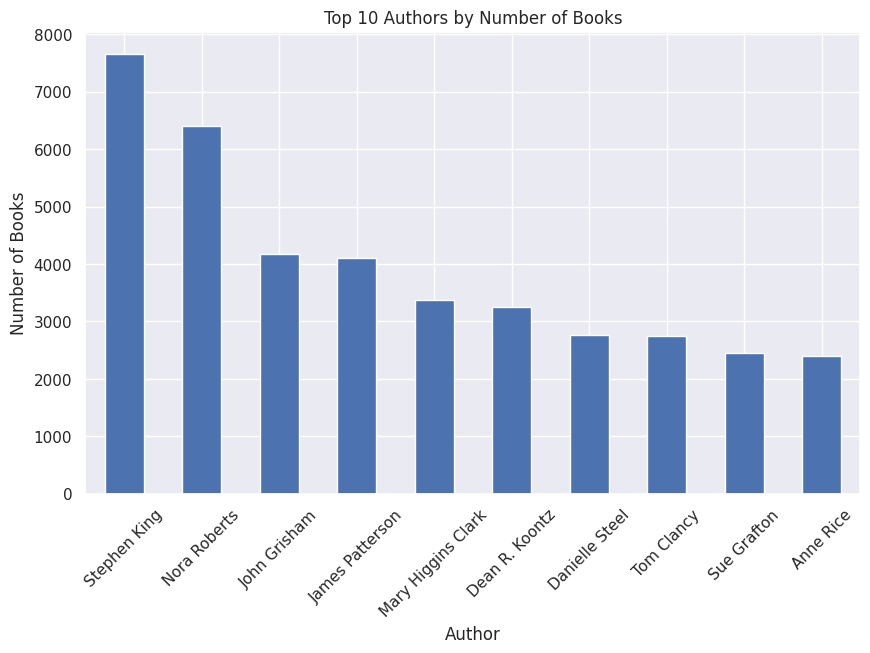

In [ ]:
 # 4. Top Authors by Number of Books
top_authors = data['book_author'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar')
plt.title('Top 10 Authors by Number of Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()


**The analysis reveals that "Stephen King" is the author with the highest rating count among publishers in the dataset, indicating the popularity of his works.**

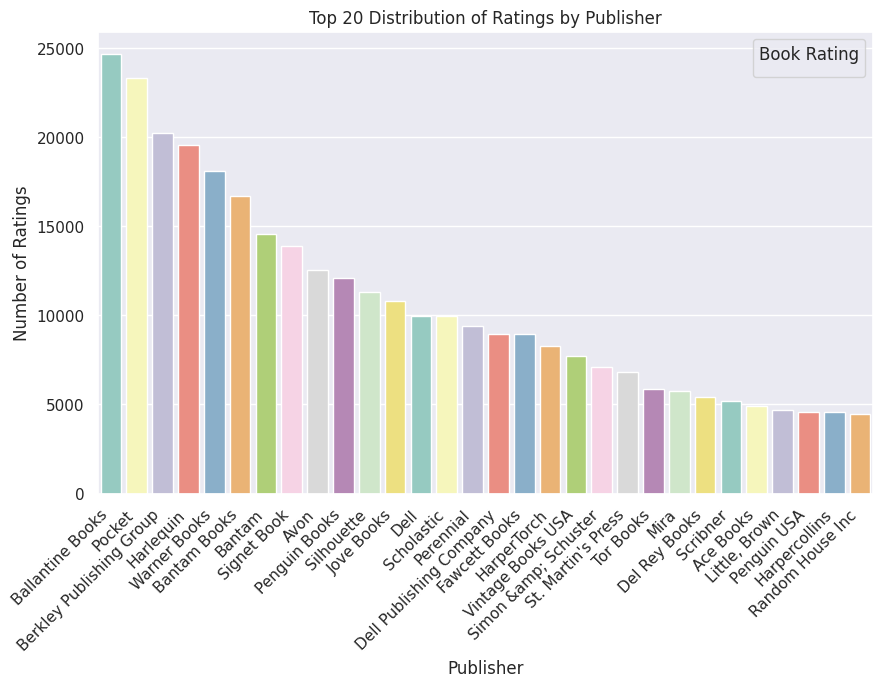

In [ ]:
# 6. Distribution of Ratings by Publisher
plt.figure(figsize=(10, 6))
top_publishers = data['publisher'].value_counts().head(30).index
sns.countplot(data=data, x='publisher', order=top_publishers, palette='Set3')
plt.title('Top 20 Distribution of Ratings by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Book Rating')
plt.show()


**The visualization indicates that "Ballantine Books" has the highest rating count among publishers in the top 20 publishers by the number of ratings.**

#### Ratings by User

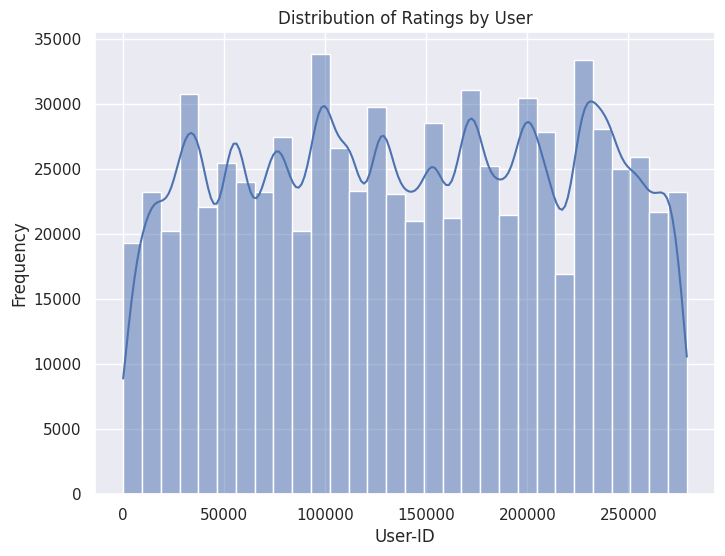

In [ ]:
# Visualization 6: Ratings by User
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='User-ID', bins=30, kde=True)
plt.title('Distribution of Ratings by User')
plt.xlabel('User-ID')
plt.ylabel('Frequency')
plt.show()

**The distribution of ratings by user highlights that users with a frequency greater than 1000 are common, and the highest frequency of ratings is observed among users in the user ID range of 200,000 to 250,000.**

####Average Ratings by Year of Publication

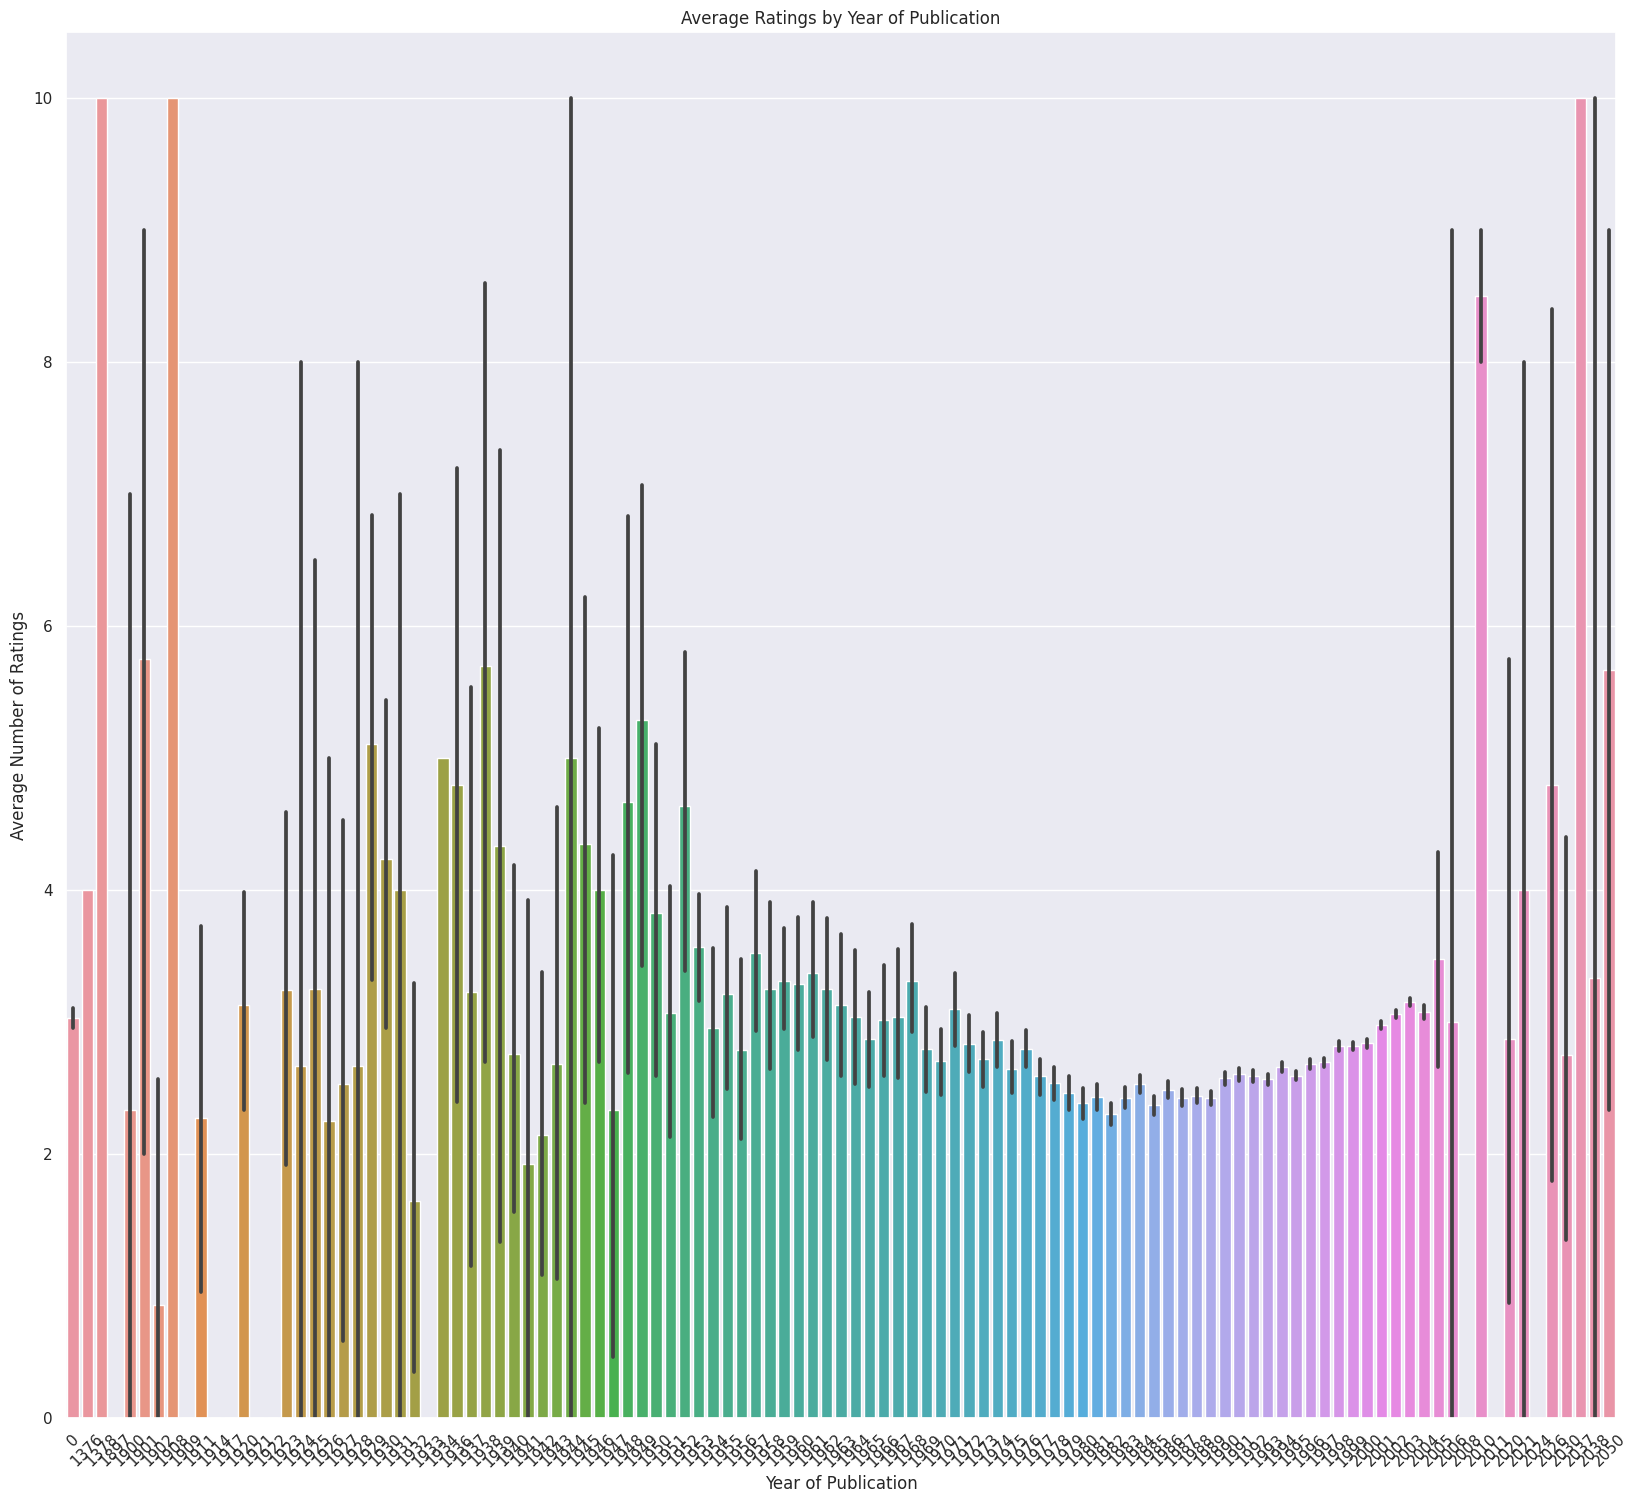

In [ ]:
# Visualization 7: Average Ratings by Year of Publication
plt.figure(figsize=(20,18))
sns.barplot(data=data, x='year_of_publication', y='Book-Rating')
plt.title('Average Ratings by Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Average Number of Ratings')
plt.xticks(rotation=45)
plt.show()

**The data visualization indicates that books published in the year, on average, receive the highest ratings, potentially suggesting their enduring appeal and quality.**

##**Feature Engineering & Data Pre-processing**

### Data Preparation (Data Cleaning and Feature Engineering)


In [ ]:
rating_data['User-ID'].value_counts()

11676     13602
198711    7550 
153662    6109 
98391     5891 
35859     5850 
          ...  
116180    1    
116166    1    
116154    1    
116137    1    
276723    1    
Name: User-ID, Length: 105283, dtype: int64

In [ ]:
rating_data['User-ID'].unique().shape

(105283,)

In [ ]:
x = rating_data['User-ID'].value_counts() >200

In [ ]:
x[x].shape

(899,)

In [ ]:
y = x[x].index

In [ ]:
rating = rating_data[rating_data['User-ID'].isin(y)]

In [ ]:
rating.head()

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [ ]:
rating.shape

(526356, 3)

##  **Popularity Based Recommendation Systems**

In [ ]:
# Perform the merge
rating_with_book = rating.merge(book_data, on="ISBN")
rating_with_book.shape

(487671, 8)

In [ ]:
rating_with_book.head()

,User-ID,ISBN,Book-Rating,book_title,book_author,year_of_publication,publisher,image_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg


In [ ]:
num_rating = rating_with_book.groupby('book_title')['Book-Rating'].count().reset_index()
# Rename the 'Book-Rating' column to 'num_of_rating' in the num_rating DataFrame
num_rating.rename(columns={'Book-Rating': 'num_of_rating'}, inplace=True)
num_rating

,book_title,num_of_rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance for the 1990s,1
4,Clifford Visita El Hospital (Clifford El Gran Perro Colorado),1
...,...,...
160264,Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.,3
160265,Ã?Â?lpiraten.,1
160266,Ã?Â?rger mit Produkt X. Roman.,1
160267,Ã?Â?stlich der Berge.,1


In [ ]:
final_rating = rating_with_book.merge(num_rating, on='book_title')
final_rating.head()

,User-ID,ISBN,Book-Rating,book_title,book_author,year_of_publication,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg,82


In [ ]:
final_rating.shape

(487671, 9)

In [ ]:
popular_df = final_rating[final_rating['num_of_rating']>=50]
popular_df

,User-ID,ISBN,Book-Rating,book_title,book_author,year_of_publication,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg,82
...,...,...,...,...,...,...,...,...,...
236701,255489,0553579983,7,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.01.LZZZZZZZ.jpg,50
236702,256407,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.01.LZZZZZZZ.jpg,50
236703,257204,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.01.LZZZZZZZ.jpg,50
236704,261829,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.01.LZZZZZZZ.jpg,50


In [ ]:
popular_df.drop_duplicates(['User-ID','book_title'],inplace = True)

In [ ]:
popular_df.shape

(59850, 9)

In [ ]:
book_pivot= popular_df.pivot_table(columns = 'User-ID', index = 'book_title', values ='Book-Rating')

In [ ]:
book_pivot

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
book_title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [ ]:
book_pivot.fillna(0, inplace = True)

In [ ]:
book_pivot

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
book_title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###**Training Model**

In [ ]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)
type(book_sparse)

scipy.sparse._csr.csr_matrix

In [ ]:
# Now import our clustering algoritm which is Nearest Neighbors this is an unsupervised ml algo
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm= 'brute')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [ ]:
distance, suggestion = model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1), n_neighbors=6 )
distance


array([[ 0.        , 68.78953409, 69.5413546 , 72.64296249, 76.83098333,
        77.28518616]])

In [ ]:
suggestion

array([[237, 240, 238, 241, 184, 536]])

In [ ]:
book_pivot.iloc[241,:]

User-ID
254       9.0
2276      0.0
2766      0.0
2977      0.0
3363      0.0
         ... 
275970    9.0
277427    0.0
277478    0.0
277639    0.0
278418    0.0
Name: Harry Potter and the Sorcerer's Stone (Book 1), Length: 888, dtype: float64

In [ ]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='book_title')


In [ ]:
book_pivot.index[3]

'4 Blondes'

In [ ]:
#keeping books name
book_names = book_pivot.index

In [ ]:
book_names[2]

'2nd Chance'

In [ ]:
np.where(book_pivot.index == '4 Blondes')[0][0]

3

### **FIND URL**

In [ ]:
# final_rating['title'].value_counts()
ids = np.where(final_rating['book_title'] == "Harry Potter and the Chamber of Secrets (Book 2)")[0][0]

In [ ]:
final_rating.iloc[ids]['image_url']

'http://images.amazon.com/images/P/0440115450.01.LZZZZZZZ.jpg'

In [ ]:
book_name = []
for book_id in suggestion:
    book_name.append(book_pivot.index[book_id])
    book_name[0]

In [ ]:
ids_index = []
for name in book_name[0]:
    ids = np.where(final_rating['book_title'] == name)[0][0]
    ids_index.append(ids)

In [ ]:
for idx in ids_index:
    url = final_rating.iloc[idx]['image_url']
    print(url)

http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0439136369.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0439139597.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/043936213X.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0446604232.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0440115450.01.LZZZZZZZ.jpg



###**Testing Model**


In [ ]:
def recommend_book(book_name):
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6 )

    for i in range(len(suggestion)):
            books = book_pivot.index[suggestion[i]]
            for j in books:
                if j == book_name:
                    print(f"You searched '{book_name}'\n")
                    print("The suggestion books are: \n")
                else:
                    print(j)

In [ ]:
book_name = "Harry Potter and the Chamber of Secrets (Book 2)"
recommend_book(book_name)

You searched 'Harry Potter and the Chamber of Secrets (Book 2)'

The suggestion books are: 

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Exclusive
The Cradle Will Fall


# **Conclusion**

- Users tend to give predominantly average ratings (8 out of 10).

- A scarcity of highest ratings (10) suggests users reserve this rating for exceptional books.

- The age group between 30 and 40 is most represented in the dataset.
- "The Lovely Bones: A novel" is the most highly rated book.

- 2002 was the year with the highest count of book ratings.

- "Stephen King" is the most rated author, indicating popularity.

- "Ballantine Books" is the top-rated publisher among the top 20.

- Users with IDs between 200,000 and 250,000 have the highest frequency of ratings.

- Books published in the year tend to receive the highest ratings.

- The model suggests reading "Harry Potter and the Prisoner of Azkaban (Book 3)," "Harry Potter and the Goblet of Fire (Book 4)," and "Harry Potter and the Sorcerer's Stone (Book 1)."

- The testing model suggests the same Harry Potter series books and additional recommendations.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***